<a href="https://colab.research.google.com/github/Srithan02-code/Stock_Price_Prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-19, end.month, end.day)

In [4]:
stock = "TSLA"
tesla_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
tesla_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [6]:
tesla_data.shape

(3761, 5)

In [7]:
tesla_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,3761.000000,3761.000000,3761.000000,3761.000000,3.761000e+03
mean,88.316400,90.323001,86.217250,88.340911,9.706115e+07
std,113.552929,116.242680,110.785225,113.645943,7.693533e+07
min,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,12.495333,12.756000,12.180000,12.410000,5.005350e+07
50%,18.746000,19.100000,18.433332,18.755333,8.316600e+07
75%,190.946671,196.250000,186.009995,190.740005,1.225245e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [8]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3761 entries, 2010-06-29 to 2025-06-10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3761 non-null   float64
 1   (High, TSLA)    3761 non-null   float64
 2   (Low, TSLA)     3761 non-null   float64
 3   (Open, TSLA)    3761 non-null   float64
 4   (Volume, TSLA)  3761 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.3 KB


In [9]:
tesla_data.isna().sum()

,,0
Price,Ticker,
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Tesla data')

<Figure size 1500x500 with 0 Axes>

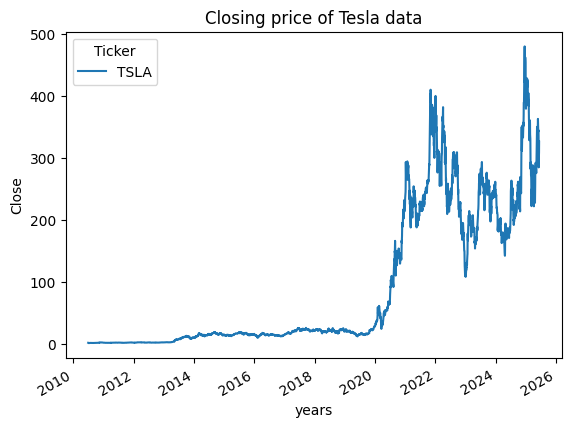

In [11]:
plt.figure(figsize = (15,5))
tesla_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Tesla data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Tesla data")

In [13]:
tesla_data.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

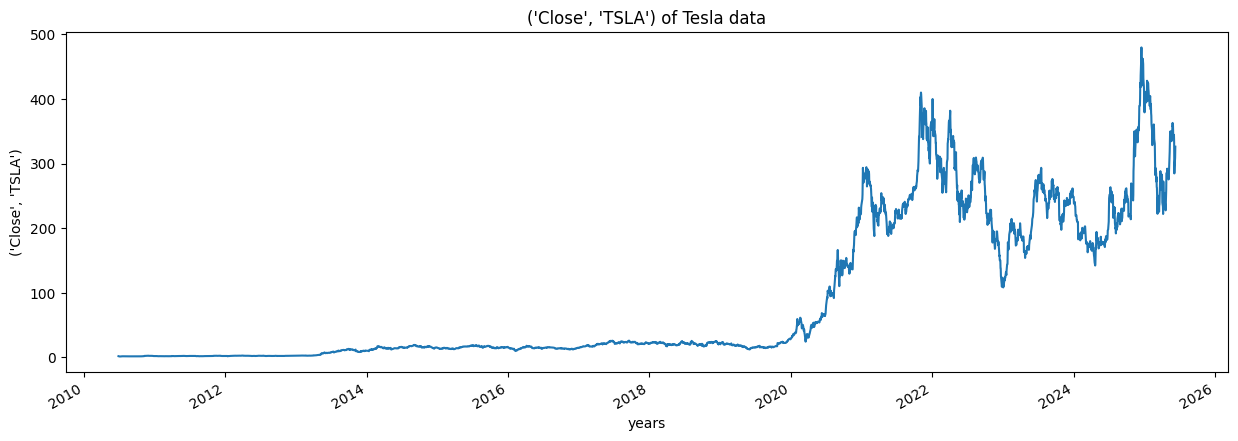

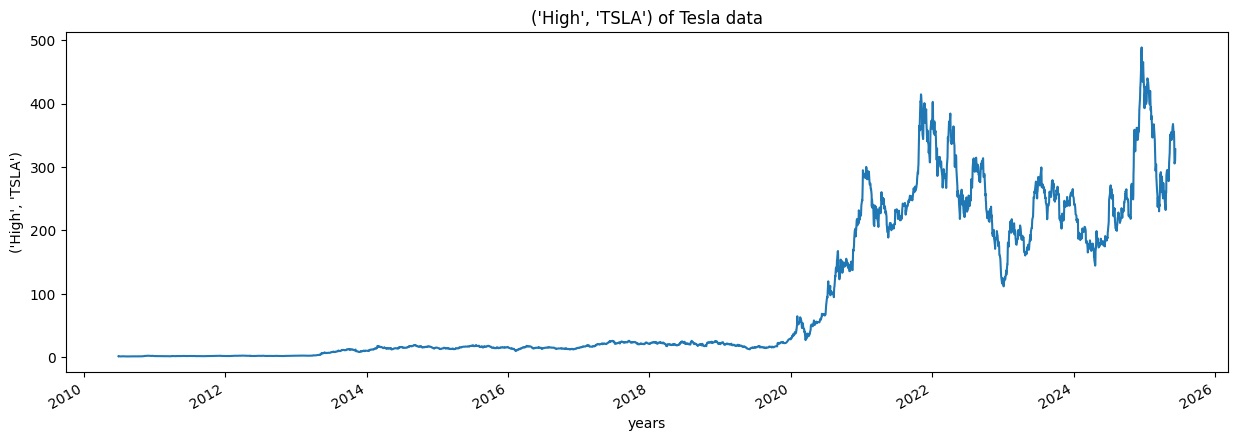

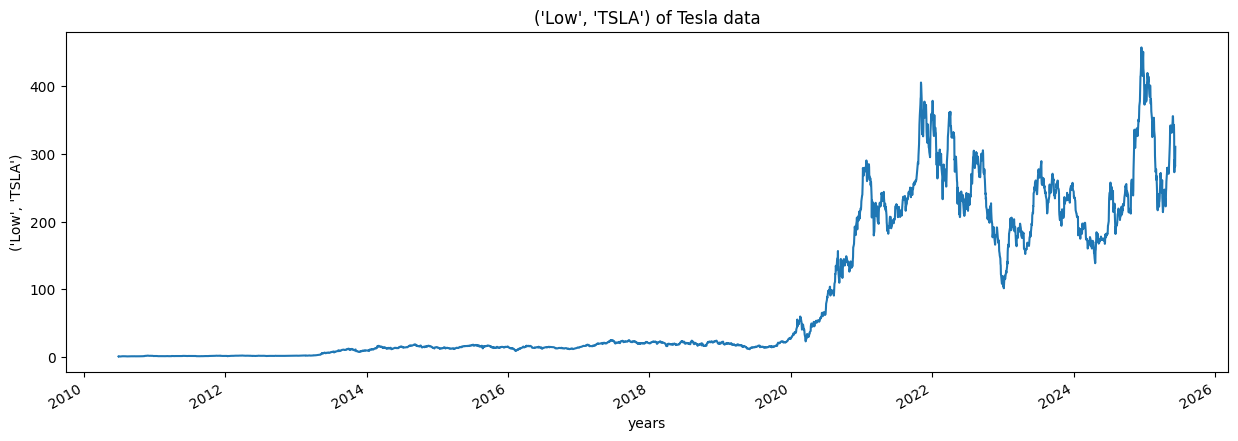

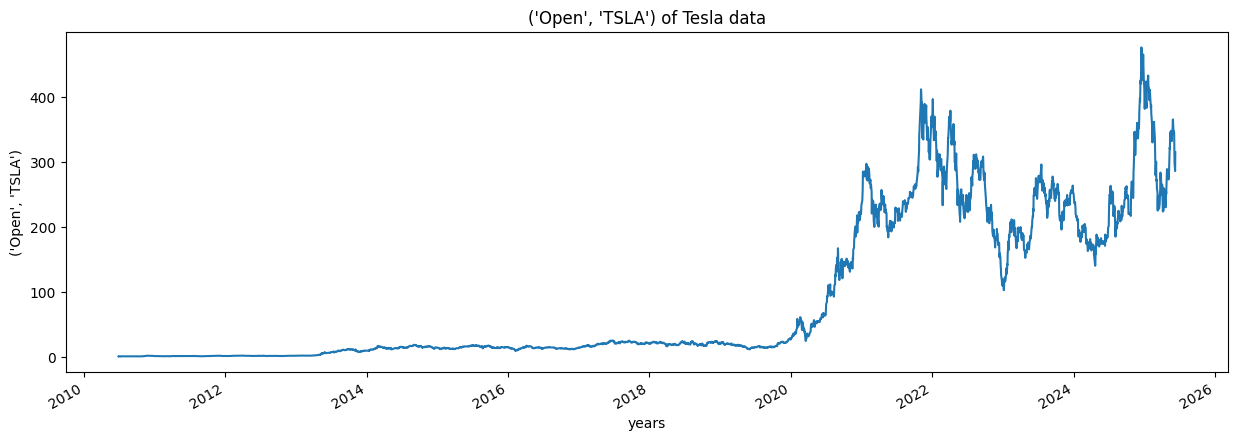

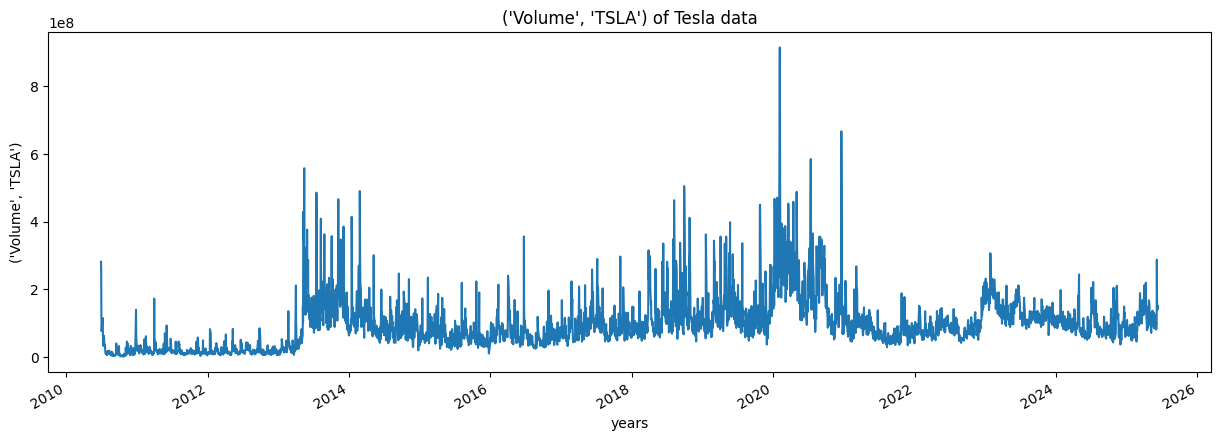

In [14]:
for column in tesla_data.columns:
    plot_graph((15,5),tesla_data[column], column)

In [15]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2006,2026):
    print(i,list(tesla_data.index.year).count(i))

2006 0
2007 0
2008 0
2009 0
2010 130
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 109


In [19]:
tesla_data['MA_for_250_days'] = tesla_data['Close'].rolling(250).mean()

In [20]:
tesla_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2011-06-17,NaN
2011-06-20,NaN
2011-06-21,NaN
2011-06-22,NaN
2011-06-23,1.629872


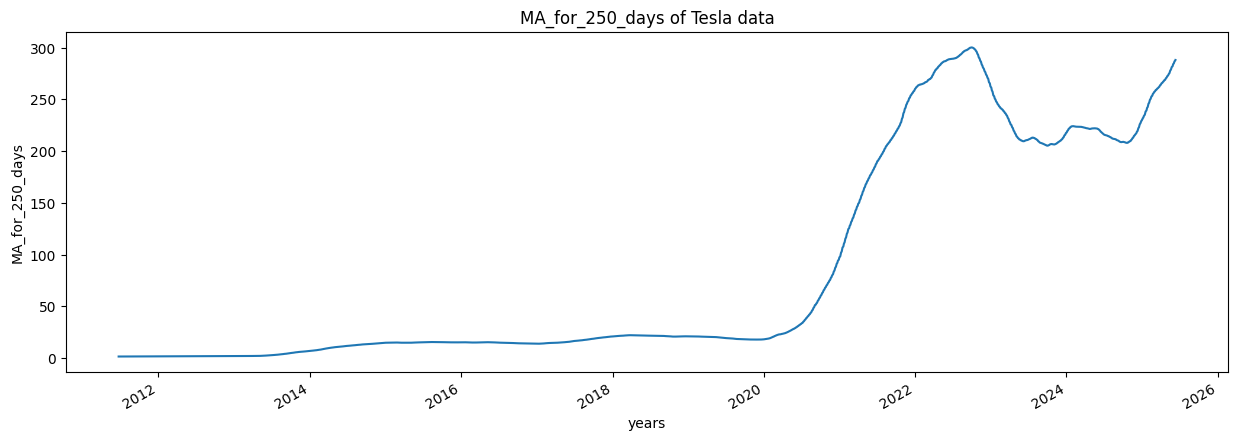

In [21]:
plot_graph((15,5), tesla_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

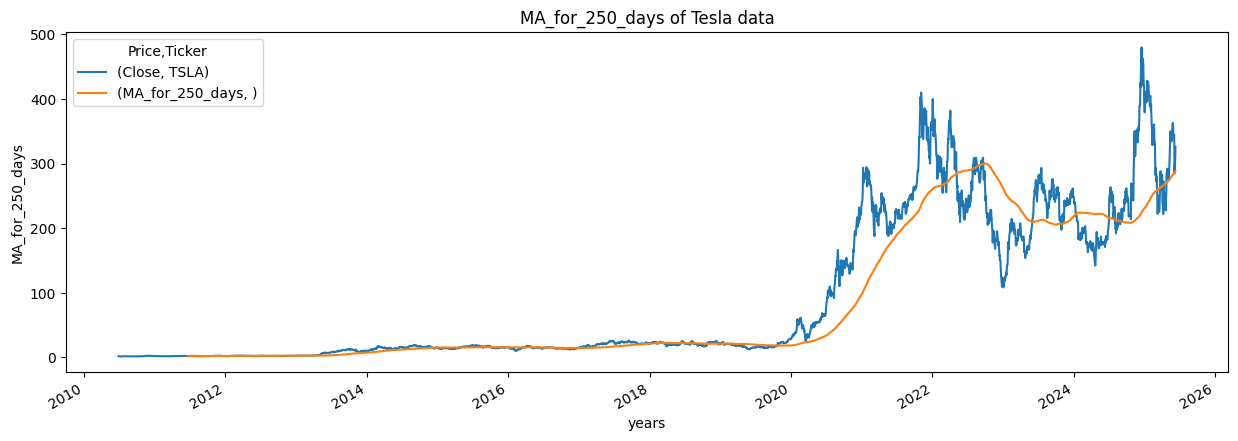

In [22]:
plot_graph((15,5), tesla_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

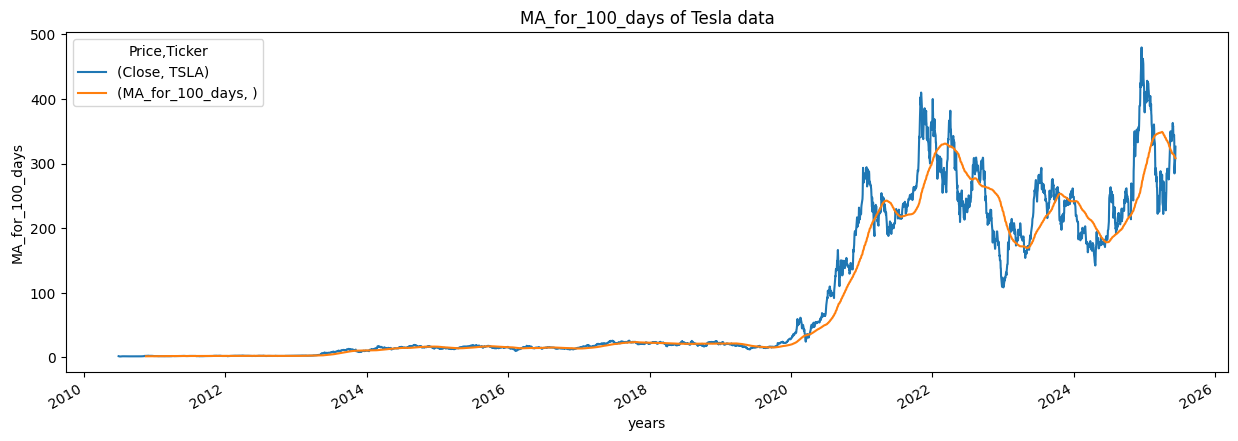

In [23]:
tesla_data['MA_for_100_days'] = tesla_data['Close'].rolling(100).mean()
plot_graph((15,5), tesla_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

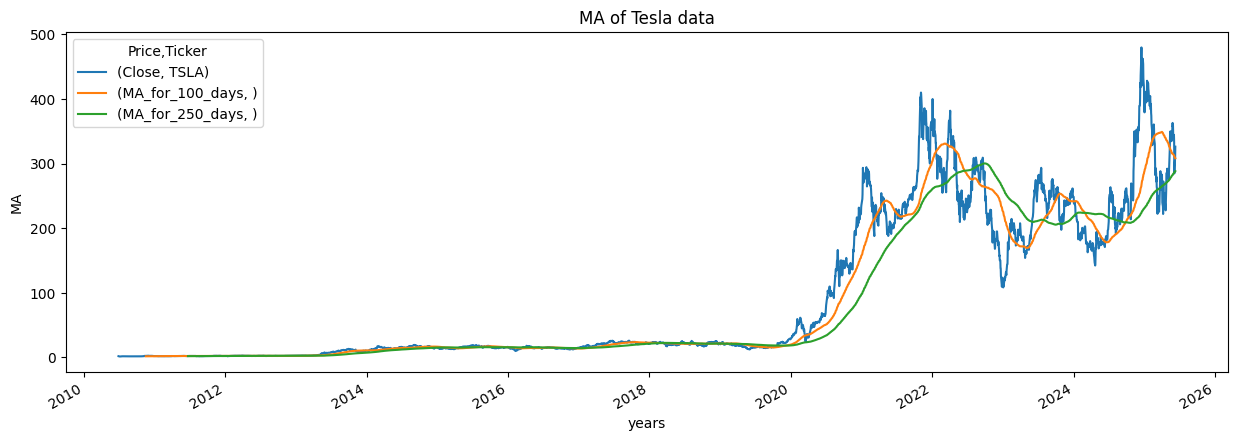

In [24]:
plot_graph((15,5), tesla_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [25]:
tesla_data['percentage_change_cp'] = tesla_data['Close'].pct_change()
tesla_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,TSLA,
Date,,
2010-06-29,1.592667,NaN
2010-06-30,1.588667,-0.002511
2010-07-01,1.464000,-0.078473
2010-07-02,1.280000,-0.125683
2010-07-06,1.074000,-0.160937


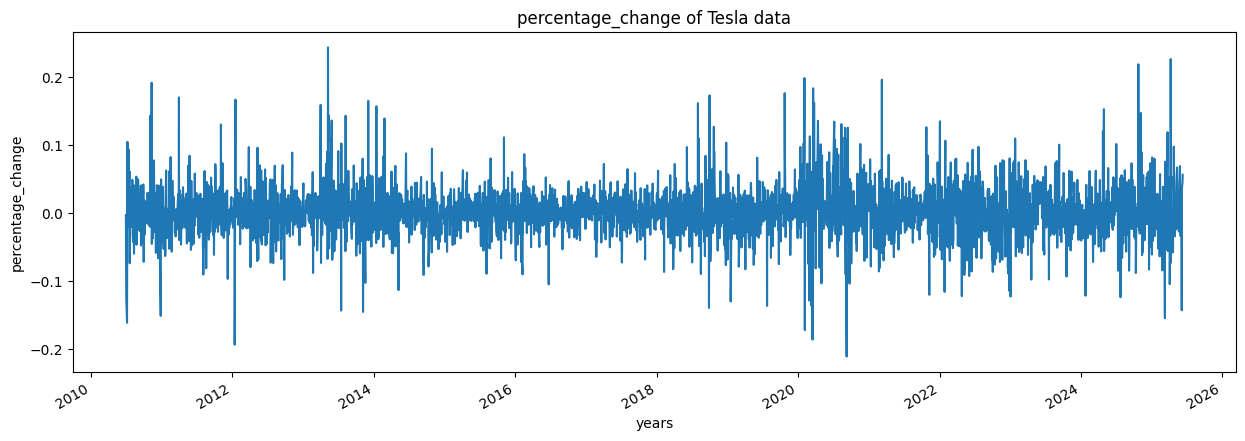

In [26]:
plot_graph((15,5), tesla_data['percentage_change_cp'], 'percentage_change')

In [27]:
Close_price = tesla_data[['Close']]

In [28]:
max(Close_price.values),min(Close_price.values)

(array([479.85998535]), array([1.05333304]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)
scaled_data

array([[0.00112641],
       [0.00111806],
       [0.00085769],
       ...,
       [0.61420759],
       [0.64227732],
       [0.67884743]])

In [30]:
len(scaled_data)

3761

In [31]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[1.12641280e-03],
        [1.11805880e-03],
        [8.57688465e-04],
        [4.73399704e-04],
        [4.31634707e-05],
        [0.00000000e+00],
        [2.31130854e-04],
        [2.22776609e-04],
        [1.74045136e-04],
        [3.25809799e-04],
        [5.62510895e-04],
        [5.69471894e-04],
        [6.73898329e-04],
        [8.50727466e-04],
        [6.26557611e-04],
        [6.15419615e-04],
        [7.24022798e-04],
        [7.64400276e-04],
        [7.17061799e-04],
        [6.61367087e-04],
        [6.85036325e-04],
        [6.33520851e-04],
        [5.76432893e-04],
        [7.12884802e-04],
        [8.56295468e-04],
        [7.60223278e-04],
        [6.47442848e-04],
        [5.27701420e-04],
        [5.29094416e-04],
        [4.49730465e-04],
        [2.92393569e-04],
        [2.50623094e-04],
        [3.50872282e-04],
        [4.14920990e-04],
        [4.66438705e-04],
        [4.13527994e-04],
        [4.16313986e-04],
        [4.59475465e-04],
        [6.0

In [33]:
int(len(x_data)*0.7)

2562

In [34]:
4908-100-int(len(x_data)*0.7)

2246

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2562, 100, 1)
(2562, 1)
(1099, 100, 1)
(1099, 1)


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [38]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.fit(x_train, y_train, batch_size=1, epochs = 5)

Epoch 1/5
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 188s 72ms/step - loss: 9.8734e-04
Epoch 2/5
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 212s 76ms/step - loss: 4.4417e-04
Epoch 3/5
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 194s 73ms/step - loss: 4.7084e-04
Epoch 4/5
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 204s 74ms/step - loss: 1.0457e-04
Epoch 5/5
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 198s 72ms/step - loss: 1.2573e-04


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [42]:
predictions = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step


In [43]:
predictions

array([[0.60400677],
       [0.6138339 ],
       [0.6114898 ],
       ...,
       [0.64969003],
       [0.6200799 ],
       [0.6277189 ]], dtype=float32)

In [44]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[290.25577],
       [294.9611 ],
       [293.83868],
       ...,
       [312.12924],
       [297.9517 ],
       [301.6093 ]], dtype=float32)

In [45]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[294.36334229],
       [288.05334473],
       [278.47665405],
       ...,
       [295.14001465],
       [308.57998657],
       [326.08999634]])

In [46]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [47]:
rmse

np.float64(11.723459534569114)

In [48]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = tesla_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-01-26,294.363342,290.255768
2021-01-27,288.053345,294.961090
2021-01-28,278.476654,293.838684
2021-01-29,264.510010,286.833710
2021-02-01,279.936676,274.814423


<Figure size 640x480 with 0 Axes>

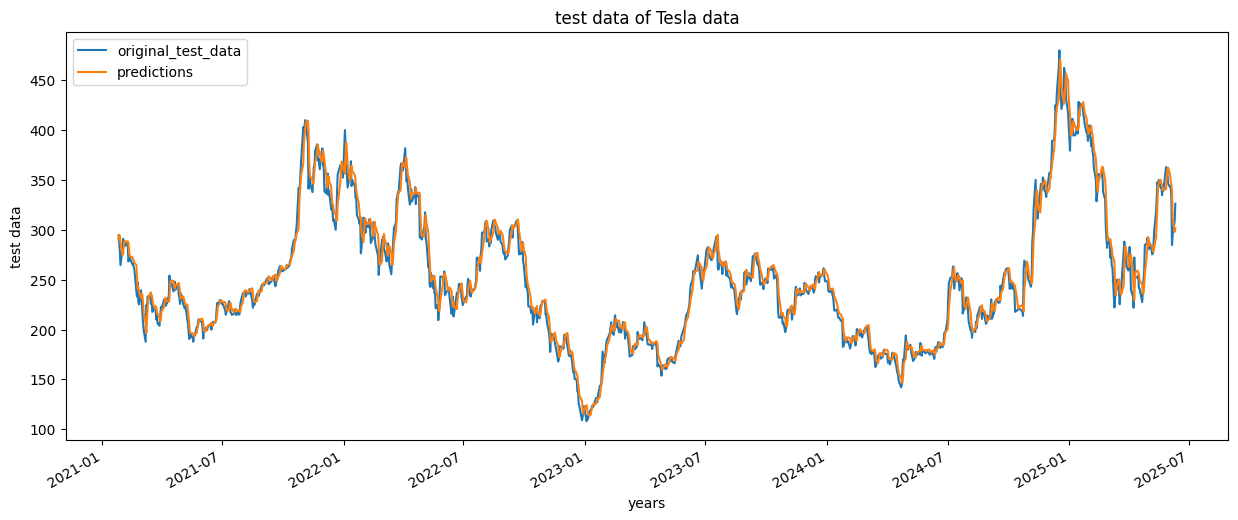

In [49]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

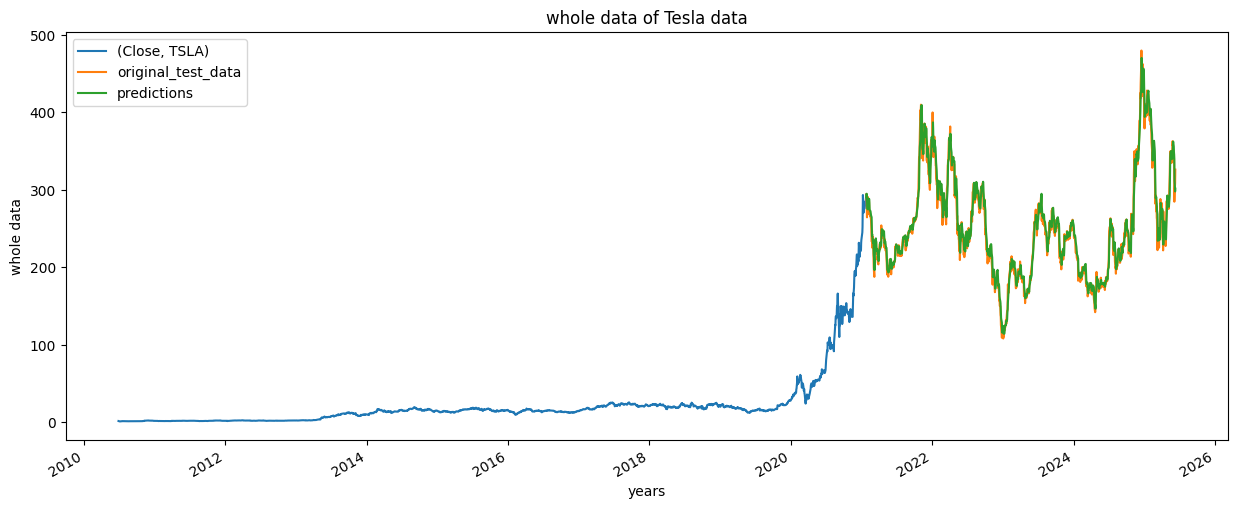

In [50]:
plot_graph((15,6), pd.concat([Close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [51]:
model.save("Stock_price_model.keras")